In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_2d, plot_1d, plot_current_profile
from distgen.physical_constants import unit_registry
from matplotlib import pyplot as plt
import yaml

In [3]:
gen = Generator(verbose=0) 
units = {'x':'mm', 'y':'mm', 'px':'keV/c', 'py':'keV/c', 't':'ps', 'q':'pC', 'I':'A'}

# Radial Distributions
----------------------

# Radial Uniform
Typical usage is shown below for a uniformly filled ring:


YAML input:
r_dist:
  max_r:
    units: mm
    value: 2
  min_r:
    units: mm
    value: 1
  type: radial_uniform



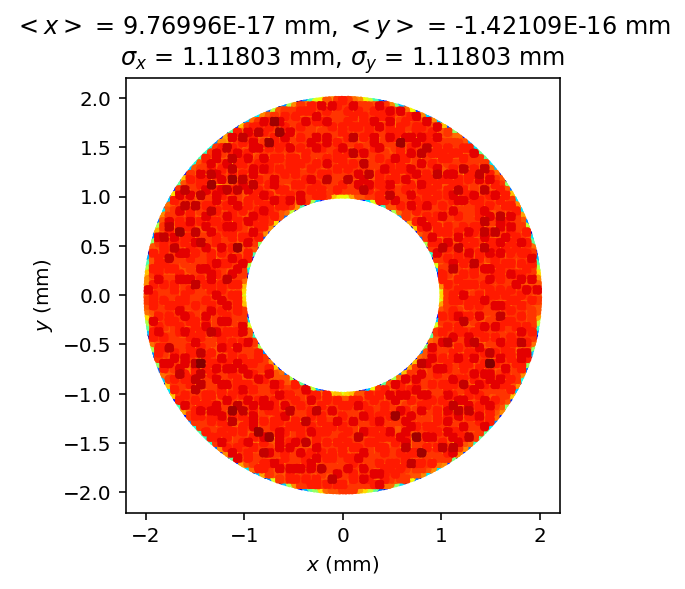

In [4]:
gen=Generator('data/rad.uniform.in.yaml',verbose=0)
beam = gen.beam()
print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_2d(beam, 1,
        'x', units['x'],
        'y', units['y'],
        'scatter_hist2d',
        nbins=75,
        axis='equal',
        title_on=True);

# Radial Gaussian (with Truncation)

Here three examples are provided: a non-truncated Gaussian with $\sigma_{x,y}$ = 2 mm, followed by a truncated Gaussian using a truncation fraction to specify the maximal radial cut, followed by a truncated Gaussian using n_sigma_cutoff to specify the radial cut.

Example 1: canonical Gaussian with $\sigma_{x,y}$ = 2mm


YAML input:
r_dist:
  sigma_xy:
    units: mm
    value: 2
  type: radial_gaussian



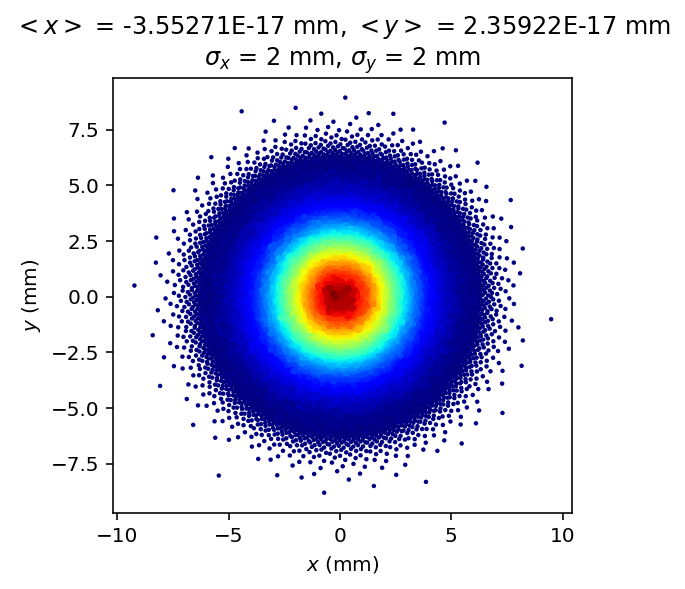

In [5]:
# Radial gaussian distribution with sigma_xy 2 mm
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_2d(beam, 1,
        'x', units['x'],
        'y', units['y'],
        'scatter_hist2d',
        nbins=200,
        axis='equal',
        title_on=True);

Example 2: Truncated Gaussian with a pinhole radius of 1 mm, clipped at 50% intensity


YAML input:
r_dist:
  truncation_fraction:
    units: dimensionless
    value: 0.5
  truncation_radius:
    units: mm
    value: 1
  type: rg



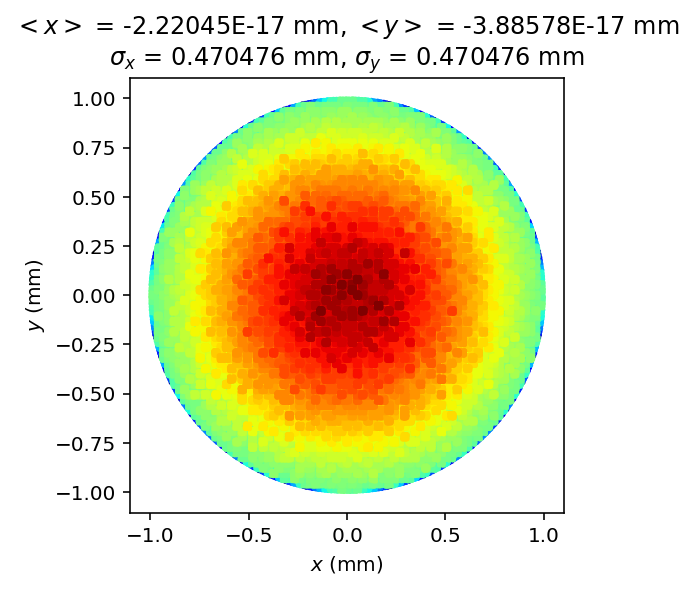

In [6]:
# Truncated radial gaussian distribution with pihole diameter of 2 mm, gaussian clipped at 50% intensity
gen=Generator('data/rad.trunc.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_2d(beam, 1,
        'x', units['x'],
        'y',units['y'],
        'scatter_hist2d',
        nbins=75,
        axis='equal',
        title_on=True);

Example 3: truncated Gaussian using underlying $\sigma_{x,y}$ = 2 mm and n_sigma_cutoff = 1


YAML input:
r_dist:
  n_sigma_cutoff: 1
  sigma_xy:
    units: mm
    value: 2
  type: radial_gaussian



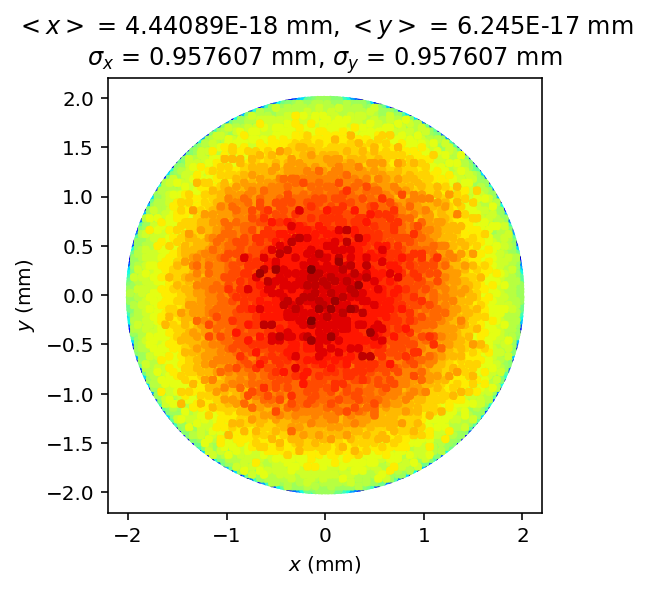

In [7]:
# Radial gaussian distribution with cut using n_sigma_cutoff
gen=Generator('data/rad.gaussian.in.yaml',verbose=0)
gen.input['r_dist']['n_sigma_cutoff'] = 1
beam = gen.beam()

print("\nYAML input:")
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_2d(beam,1,
        'x', units['x'],
        'y', units['y'],
        'scatter_hist2d',
        nbins=100,
        axis='equal', 
        title_on=True);

# Radial File


YAML input:
r_dist:
  file: data/cutgauss.rad.txt
  type: radfile
  units: mm



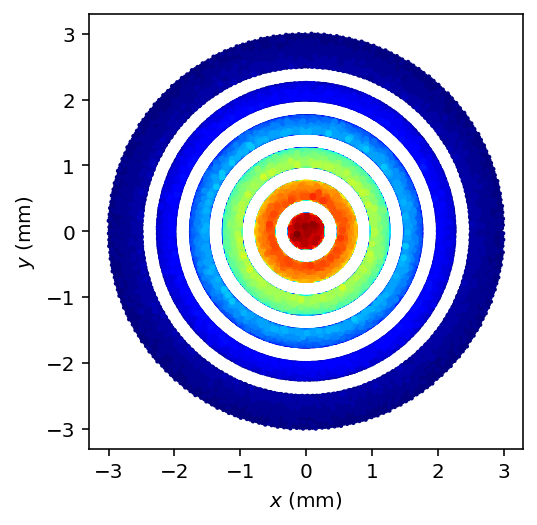

In [8]:
# Radial distribution file: a radial gaussian with cuts in it
gen=Generator('data/rad.file.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

# X-Y Plot
plot_2d(beam, 1,
        'x', units['x'],
        'y', units['y'],
        'scatter_hist2d',
        nbins=200,
        axis='equal');

# Radial Tukey


YAML Input:
r_dist:
  length:
    units: mm
    value: 5
  ratio:
    units: ''
    value: 0.25
  type: radial_tukey



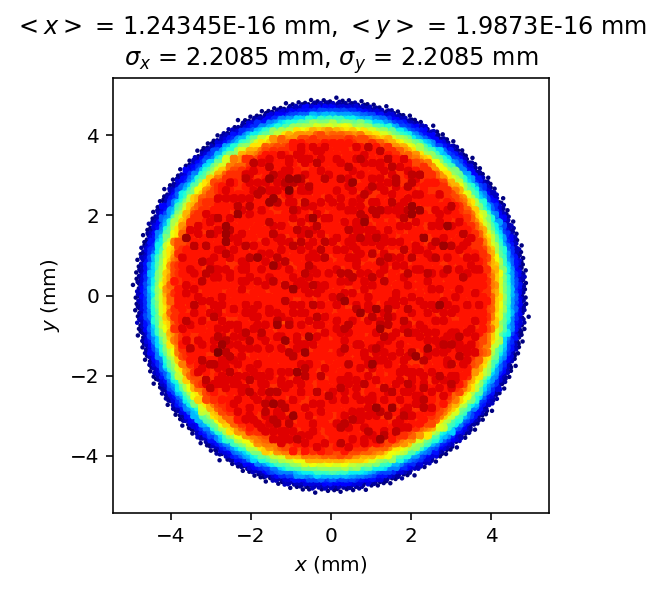

In [9]:
# Radial Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_2d(beam, 1,
        'x', units['x'], 
        'y', units['y'],
        'scatter_hist2d',
        nbins=100,
        axis='equal', 
        title_on=True);

# Radial Super Gaussian
Example 1: hyper-Gaussian (uniform) limit (power $\rightarrow\infty$): $\sigma_{x,y}$ = 1 mm


YAML Input:
r_dist:
  alpha:
    units: ''
    value: 0
  sigma_xy:
    units: mm
    value: 1
  type: rsg



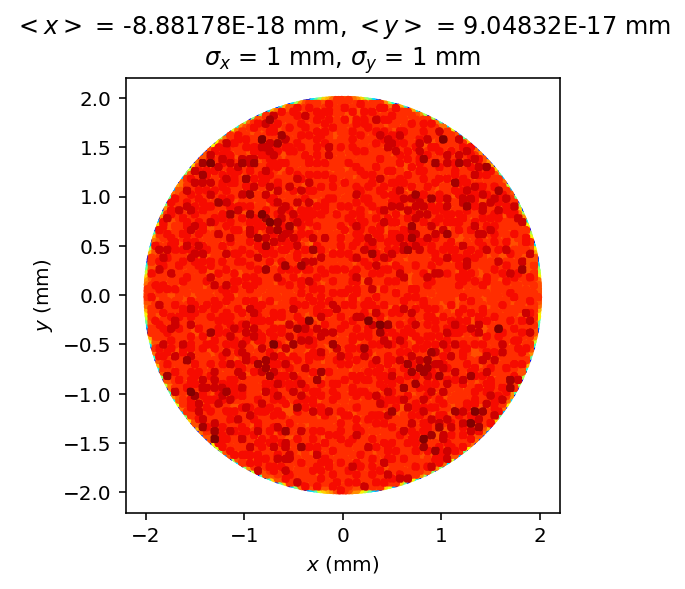

In [10]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
beam = gen.beam()

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_2d(beam, 1,
        'x', units['x'],
        'y', units['y'],
        'scatter_hist2d',
        nbins=100,
        axis='equal',
        title_on=True);

Example 2: Gaussian limit (power = 1): $\sigma_{x,y}$ = 1 mm


YAML Input:
r_dist:
  alpha:
    units: ''
    value: 1.0
  sigma_xy:
    units: mm
    value: 1
  type: rsg



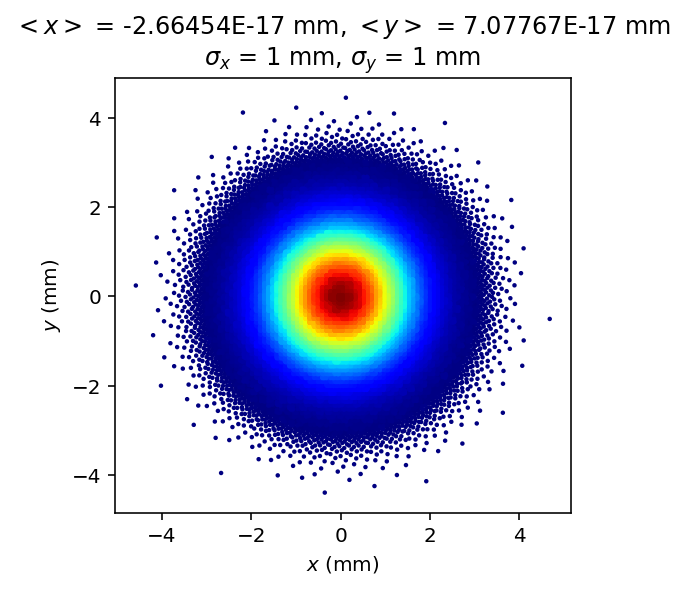

In [11]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
gen['r_dist:alpha:value']=1.0
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'r_dist':gen.input['r_dist']}))

plot_2d(beam, 1,
        'x', units['x'],
        'y', units['y'],
        'scatter_hist2d',
        nbins=100,
        axis='equal',
        title_on=True);

Example 3: sub-Gaussian (power < 1): $\sigma_{x,y} = 1$ mm power = 0.5 


YAML Input:
r_dist:
  p:
    units: ''
    value: 0.5
  sigma_xy:
    units: mm
    value: 1
  type: rsg



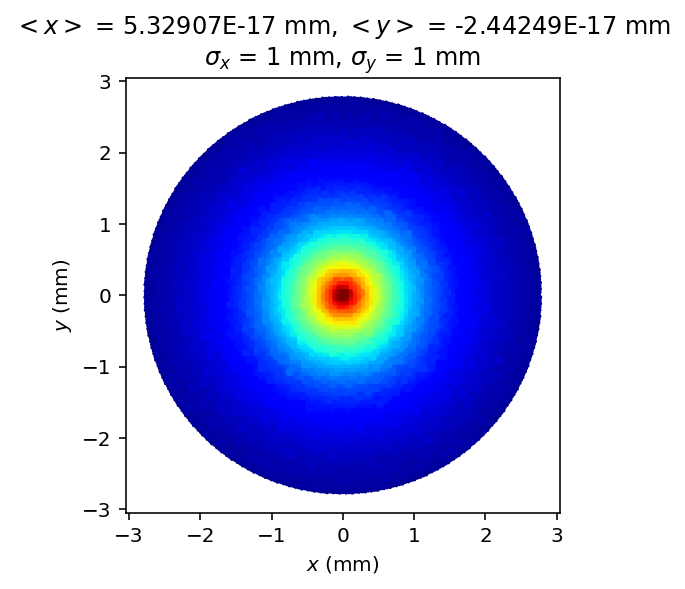

In [12]:
gen=Generator('data/SG.beer.can.in.yaml',verbose=0)
del gen.input['r_dist']['alpha']

gen.input['r_dist']['p'] = {'value':0.5,'units':''}
beam = gen.beam()

print("\nYAML Input:")
print(yaml.dump({'r_dist':gen.input["r_dist"]}))

plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal",title_on=True);

# 2D Distributions
------------------

# 2D File
A 2D file distribution takes in a unormalized distribution aon a regular grid from a ascii file.  The file format specification is:

$var_1{~~~~~~}\Delta var_1{~~~~~~}<var_1>{~~~~~~}[var_1{~~}$units]

$var_2{~~~~~~}\Delta var_2{~~~~~~}<var_1>{~~~~~~}[var_2{~~}$units]

$\rho(x=x_1, y=y_1){~~~~~~}$...${~~~~~~}\rho(x=x_1, y=y_m)$

${~~~~~~~~~~~~}$.${~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$.
 
${~~~~~~~~~~~~}$.${~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$.
 
${~~~~~~~~~~~~}$.${~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$.

$\rho(x=x_n, y=y_1){~~~~~~}$...${~~~~~~}\rho(x=x_n, y=y_m)$

Here $\Delta var$ is the full range of the distribution.  The code assumes uniform grid spacing.


YAML input:
xy_dist:
  file: data/laser.image.txt
  type: file2d



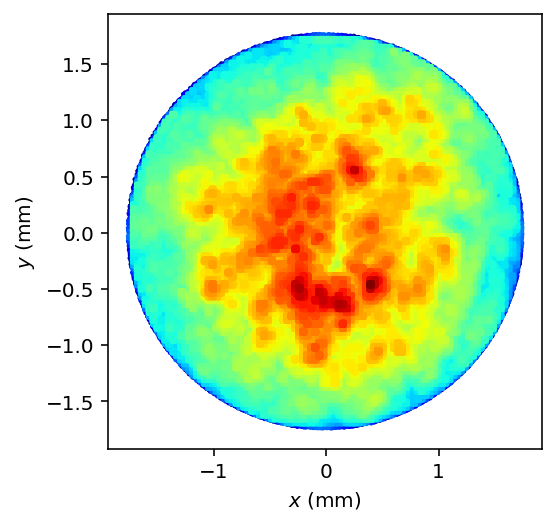

In [15]:
# 2D XY distribution: Lase Image Example
# Real laser spot image - using 1 million particles (takes a few secs)
gen=Generator('data/laser.image.in.yaml',verbose=0)

beam = gen.beam()

print('\nYAML input:')
print(yaml.dump({'xy_dist':gen.input['xy_dist']}))

# X-Y Plot
plot_2d(beam, 1,
        'x',
        units['x'],
        'y',
        units['y'],
        'scatter_hist2d',
        nbins=100,
        axis='equal');

# 1D Distributions
-----------

# Uniform


YAML Input:
x_dist:
  max_x:
    units: mm
    value: 2
  min_x:
    units: mm
    value: -1
  type: uniform



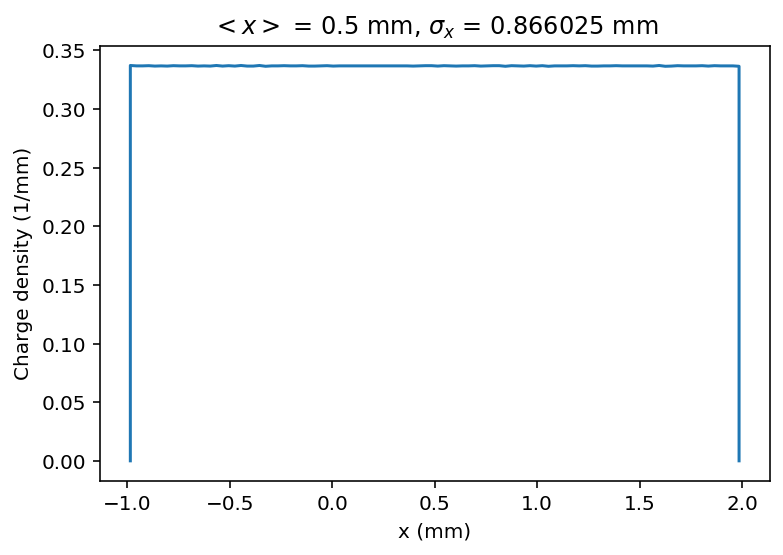

In [22]:
gen=Generator('data/x.uniform.y.file.t.gaussian.in.yaml',verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'x_dist':gen.input['x_dist']}))

plot_1d(beam, 'x', units['y'], nbins=100)

# 1D File


YAML Input:
y_dist:
  file: data/cutgauss.1d.txt
  type: file1d
  units: mm



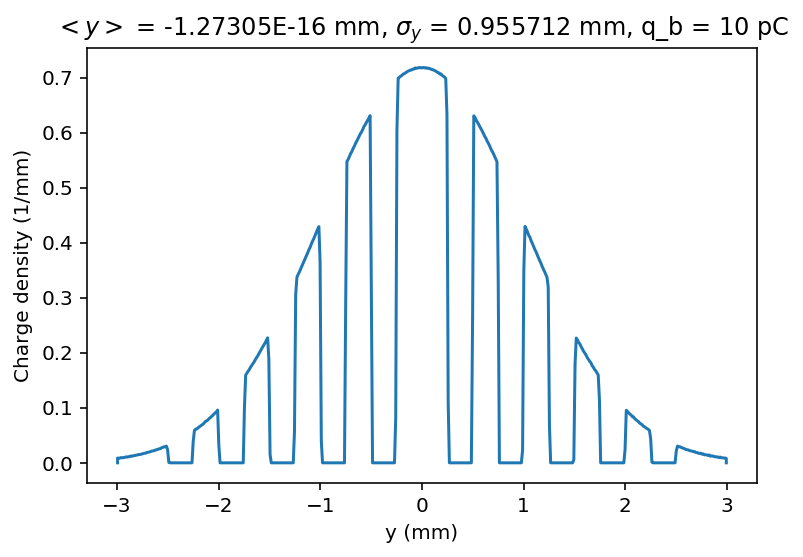

In [27]:
print('\nYAML Input:')
print(yaml.dump({'y_dist':gen.input['y_dist']}))
plot_1d(beam, 'y', units['y'], nbins=500)

# Gaussian (with Truncation)


YAML Input:
t_dist:
  avg_t:
    units: ps
    value: -0.5
  sigma_t:
    units: ps
    value: 1
  type: gaussian



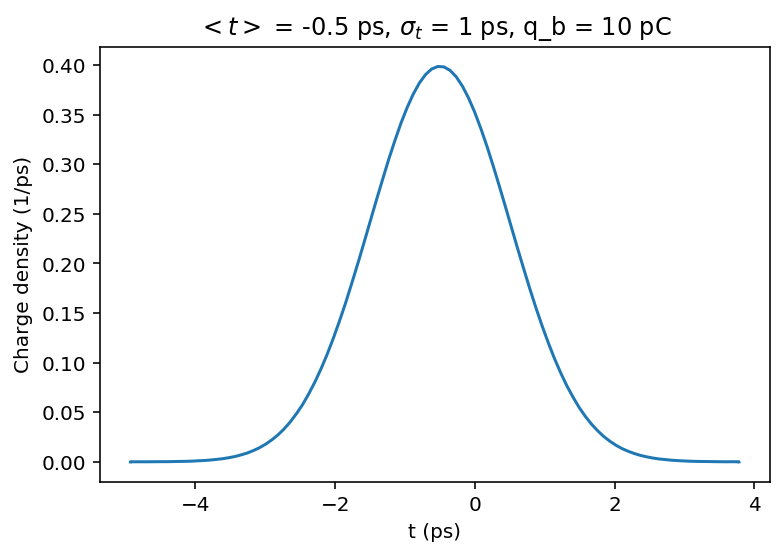

In [28]:
print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_1d(beam,"t",units["t"],nbins=100)

# Tukey 


YAML Input:
t_dist:
  length:
    units: ps
    value: 5.0
  ratio:
    units: ''
    value: 0.75
  type: tukey



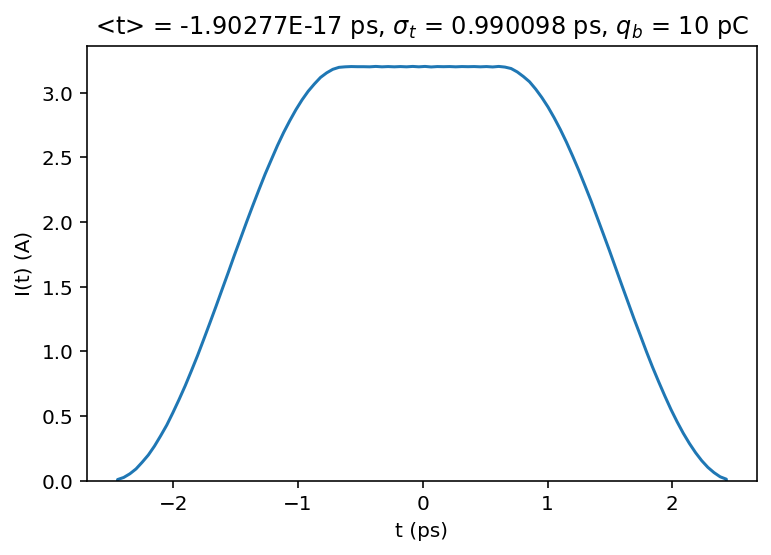

In [29]:
# Tukey distribution
gen=Generator('data/tukey.beer.can.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_current_profile(beam,1,units, title_on=True)


YAML Input:
t_dist:
  alpha:
    units: ''
    value: 0.5
  sigma_t:
    units: ps
    value: 8.0
  type: sg



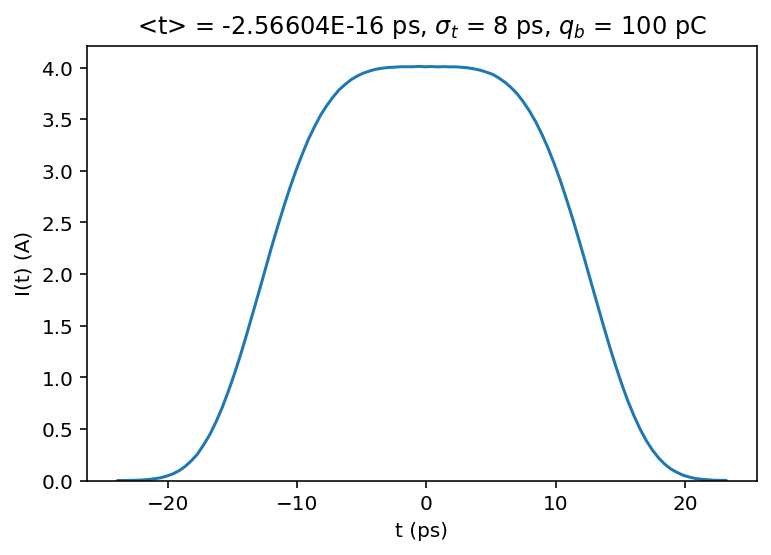

In [30]:
# Super Gaussian distribution
gen=Generator('data/SG.beer.can.in.yaml', verbose=0)
beam = gen.beam()

print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))

plot_current_profile(beam,1,units, title_on=True)

# Special Temporal Distributions
-------

# Pulse stacking temporal crystals


YAML Input:
t_dist:
  crystal_angle_1:
    units: deg
    value: 0.6
  crystal_angle_2:
    units: deg
    value: 1.8
  crystal_angle_3:
    units: deg
    value: -0.9
  crystal_angle_4:
    units: deg
    value: -0.5
  crystal_length_1:
    units: mm
    value: 15.096
  crystal_length_2:
    units: mm
    value: 7.548
  crystal_length_3:
    units: mm
    value: 3.774
  crystal_length_4:
    units: mm
    value: 1.887
  type: crystals



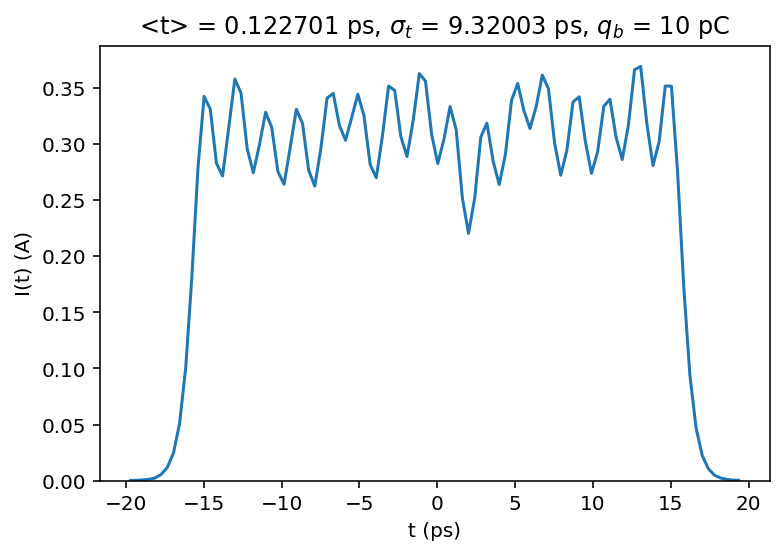

In [31]:
gen=Generator('data/t.crystals.in.yaml',verbose=0)
beam = gen.beam()
print('\nYAML Input:')
print(yaml.dump({'t_dist':gen.input['t_dist']}))
plot_current_profile(beam,1,units,title_on=True)